In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Nd = 1000
Nr = 5*Nd
dRtot = Nr*(Nr-1.)/2.
dDtot = Nd*(Nd-1.)/2.
Nest = dRtot/dDtot

In [3]:
L = 100
ran_x = L*np.random.uniform(0.,1.,Nr)
ran_y = L*np.random.uniform(0.,1.,Nr)

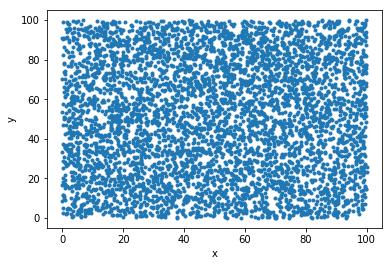

In [4]:
plt.plot(ran_x,ran_y,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

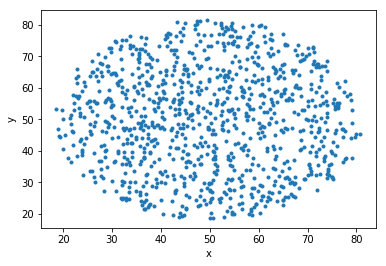

In [5]:
theta = np.random.random(Nd)*2.*np.pi
r1 = np.random.uniform(0.0,1000.,Nd)
r = np.sqrt(r1)#**(0.5)
x = r*np.cos(theta) + 50.
y = r*np.sin(theta) + 50.
plt.plot(x,y,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

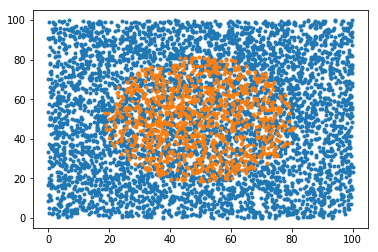

In [6]:
plt.plot(ran_x,ran_y,'.')
plt.plot(x,y,'.')
plt.show()

In [7]:
print len(x)
print len(ran_x)

1000
5000


In [8]:
def distancia(x1,x2,y1,y2):
    d = np.sqrt((x2 - x1)**2 + (y2-y1)**2)
    return d

In [9]:
dis_data = []
dis_ran = []

In [10]:
nbin = np.linspace(0.,np.sqrt(2.)*L,20)
print nbin

[  0.           7.44322928  14.88645855  22.32968783  29.7729171
  37.21614638  44.65937565  52.10260493  59.54583421  66.98906348
  74.43229276  81.87552203  89.31875131  96.76198058 104.20520986
 111.64843913 119.09166841 126.53489769 133.97812696 141.42135624]


In [11]:
for i in range(len(x)):
    for j in range(i+1,len(x)):
        d_d = distancia(x[i],x[j],y[i],y[j])
        dis_data.append(d_d)

In [12]:
for i in range(len(ran_x)):
    for j in range(i+1,len(ran_x)):
        d_r = distancia(ran_x[i],ran_x[j],ran_y[i],ran_y[j])
        dis_ran.append(d_r)

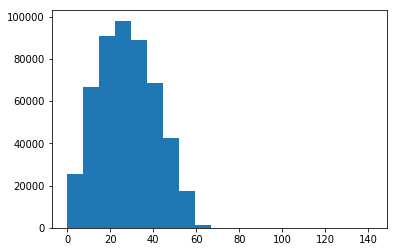

In [13]:
data_n, data_bin,m = plt.hist(dis_data,bins=nbin)

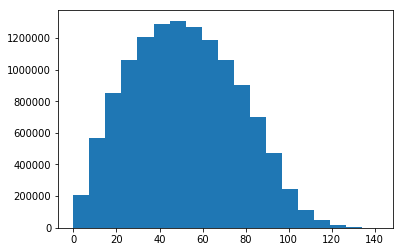

In [14]:
ran_n, ran_bin, p = plt.hist(dis_ran,bins=nbin)

Función de Correlación de Peebles $\frac{1}{N_{est}}\frac{DD(r)}{RR(r)} - 1$ 

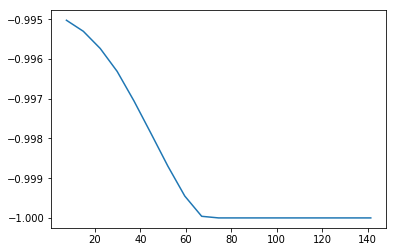

In [15]:
plt.plot(data_bin[1:],(1/Nest)*(data_n/ran_n) -1)

Para la función de correlación de Hamilton $\psi_{H}^{2} = \frac{DD(r)RR(r)}{(DR(r))^{2}}$

In [16]:
dis_dr = []

In [17]:
for i in range(len(x)):
    for j in range(len(ran_x)):
        d_dr = distancia(x[i],ran_x[j],y[i],ran_y[j])
        dis_dr.append(d_dr)

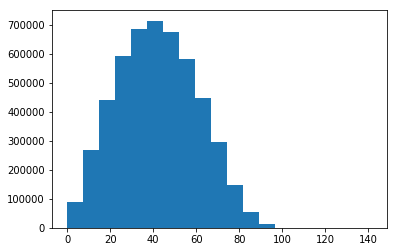

In [18]:
dr_n, dr_bin, q = plt.hist(dis_dr,bins=nbin)

/home/atarockz/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


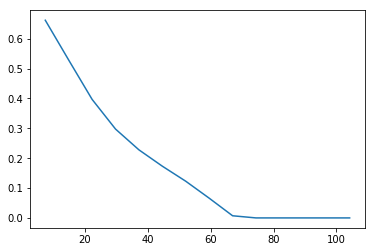

In [19]:
plt.plot(data_bin[1:],(data_n*ran_n)/(dr_n)**2)

Para la función de correlación de Landy-Szalay $1 +\frac{1}{N_{est}^{2}} \frac{DD(r)}{RR(r)} -2\frac{1}{N_{est}}\frac{DR(r)}{RR(r)} $

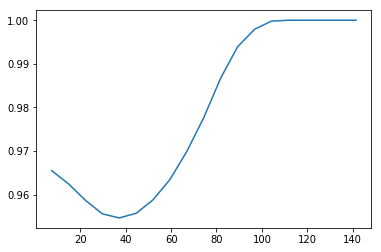

In [20]:
plt.plot(data_bin[1:],1.+ (1/Nest**2)*(data_n/ran_n) -2.*(1/Nest)*dr_n/ran_n)